In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
import sys
sys.path.append("../../../")
from src.util import operators
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_nonlinear as compute_exp_val_nonlinear
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_linear as compute_exp_val_linear
from src.util import bath_correlation_function
from src.util import debye_spectral_density  
from src.homps import homps
from src.util import operators
from src.util import noise_generator

In [6]:
# Parameters for the spin-boson model
epsilon = 2.0
delta = -2.0
# Parameters for the Debye spectral density
beta = 50.0
T = 1/beta
gamma = 5.0
eta = 0.5
# operators
sigma_x, sigma_z, eye = operators.generate_physical_operators()
L = sigma_z
h = operators.generate_spin_boson_hamiltonian(delta=delta, epsilon=epsilon)
# time window
duration = 30

In [7]:
g, w = debye_spectral_density.get_debye_coefficients(10000, T, gamma, eta)

In [8]:
N_steps = 6000
N_trunc = 9
N_terms = 13

In [9]:
alpha = lambda tau : bath_correlation_function.alpha(tau, g, w)
generator = noise_generator.ColoredNoiseGenerator_FourierFiltering(alpha, 0, duration)

In [36]:
options = {
    'linear' : False,
    'use_noise' : True,
    'method' : 'RK4',
    'chi_max' : 10,
    'eps' : 1.e-3,
    'noise_generator' : generator,
    'rescale_aux' : True,
}

In [8]:
my_homps = homps.HOMPS_Engine(g[:N_terms], w[:N_terms], h, L, duration, N_steps, N_trunc, options)

In [12]:
psis_100 = my_homps.compute_realizations(100, progressBar=tqdm)

  0%|          | 0/100 [00:00<?, ?it/s]

In [13]:
sigma_zs_100 = compute_exp_val_nonlinear(psis_100, sigma_z)

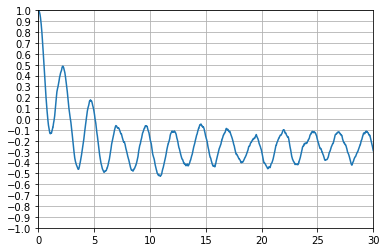

In [19]:
plt.plot(np.linspace(0, 30, N_steps), sigma_zs_100)
plt.ylim(-1, 1)
plt.yticks(np.linspace(-1.0, 1.0, 21))
plt.xlim(0, 30)
plt.grid()
plt.show()

## Using more memory terms

In [18]:
g, w = debye_spectral_density.get_debye_coefficients(10000, T, gamma, eta)

In [19]:
N_steps = 6000
N_trunc = 10
N_terms = 15
N_terms_memory = 1000

In [20]:
alpha = lambda tau : bath_correlation_function.alpha(tau, g, w)
generator = noise_generator.ColoredNoiseGenerator_FourierFiltering(alpha, 0, duration)

In [46]:
options = {
    'linear' : False,
    'use_noise' : True,
    'method' : 'RK4',
    'chi_max' : 10,
    'eps' : 1.e-3,
    'noise_generator' : generator,
    'rescale_aux' : True,
    'g_memory' : g[:N_terms_memory],
    'w_memory' : w[:N_terms_memory],
}

In [47]:
my_homps = homps.HOMPS_Engine(g[:N_terms], w[:N_terms], h, L, duration, N_steps, N_trunc, options)

In [48]:
psis_100 = my_homps.compute_realizations(100, progressBar=tqdm)

  0%|          | 0/100 [00:00<?, ?it/s]

In [49]:
sigma_zs_100 = compute_exp_val_nonlinear(psis_100, sigma_z)

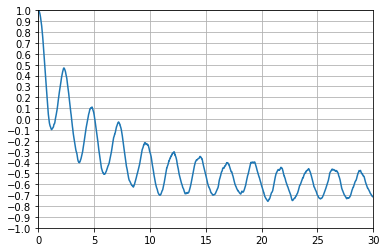

In [50]:
plt.plot(np.linspace(0, 30, N_steps), sigma_zs_100)
plt.ylim(-1, 1)
plt.yticks(np.linspace(-1.0, 1.0, 21))
plt.xlim(0, 30)
plt.grid()
plt.show()

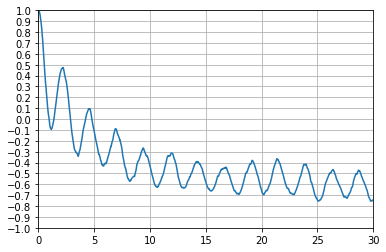

In [45]:
plt.plot(np.linspace(0, 30, N_steps), sigma_zs_100)
plt.ylim(-1, 1)
plt.yticks(np.linspace(-1.0, 1.0, 21))
plt.xlim(0, 30)
plt.grid()
plt.show()

## Using more memory terms and ordering the coefficents

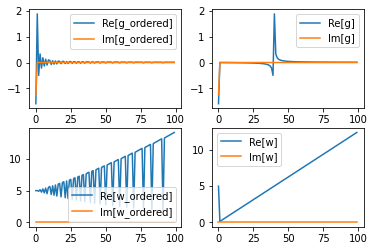

In [21]:
g, w = debye_spectral_density.get_debye_coefficients(10000, T, gamma, eta)
idx = np.flip(np.argsort(np.abs(g)))
g_ordered, w_ordered = g[idx], w[idx]
figure, axarray = plt.subplots(2, 2)
axarray[0][0].plot(np.real(g_ordered)[:100], label="Re[g_ordered]")
axarray[0][0].plot(np.imag(g_ordered)[:100], label="Im[g_ordered]")
axarray[0][0].legend()
axarray[0][1].plot(np.real(g)[:100], label="Re[g]")
axarray[0][1].plot(np.imag(g)[:100], label="Im[g]")
axarray[0][1].legend()
axarray[1][0].plot(np.real(w_ordered)[:100], label="Re[w_ordered]")
axarray[1][0].plot(np.imag(w_ordered)[:100], label="Im[w_ordered]")
axarray[1][0].legend()
axarray[1][1].plot(np.real(w)[:100], label="Re[w]")
axarray[1][1].plot(np.imag(w)[:100], label="Im[w]")
axarray[1][1].legend()
plt.show()

In [13]:
N_steps = 6000
N_trunc = 10
N_terms = 15
N_terms_memory = 4000

In [14]:
alpha = lambda tau : bath_correlation_function.alpha(tau, g, w)
generator = noise_generator.ColoredNoiseGenerator_FourierFiltering(alpha, 0, duration)

In [ ]:
options = {
    'linear' : False,
    'use_noise' : True,
    'method' : 'RK4',
    'chi_max' : 10,
    'eps' : 1.e-3,
    'noise_generator' : generator,
    'rescale_aux' : True,
    'g_memory' : g[:N_terms_memory],
    'w_memory' : w[:N_terms_memory],
}

# Loading the tests computed on the LRZ Linux cluster

In [8]:
psis_N_steps_10000_100 = np.array([np.load("../../../production/low_T_homps_test_1000/data/psi"+str(i)+".npy") for i in range(100)])
psis_N_steps_10000_1em4_100 = np.array([np.load("../../../production/low_T_homps_test_1000_1em4/data/psi"+str(i)+".npy") for i in range(100)])
psis_N_steps_6000_20 = np.array([np.load("../../../production/low_T_homps_test_6000_20/data/psi"+str(i)+".npy") for i in range(100)])
psis_N_steps_6000_30 = np.array([np.load("../../../production/low_T_homps_test_6000_30/data/psi"+str(i)+".npy") for i in range(100)])
psis_N_steps_6000_40 = np.array([np.load("../../../production/low_T_homps_test_6000_40/data/psi"+str(i)+".npy") for i in range(47)])
psis_N_steps_6000_50 = np.array([np.load("../../../production/low_T_homps_test_6000_50/data/psi"+str(i)+".npy") for i in range(21)])

In [10]:
sigma_zs_N_steps_10000_100 = compute_exp_val_nonlinear(psis_N_steps_10000_100, sigma_z)
sigma_zs_N_steps_10000_1em4_100 = compute_exp_val_nonlinear(psis_N_steps_10000_1em4_100, sigma_z)
sigma_zs_N_steps_6000_20 = compute_exp_val_nonlinear(psis_N_steps_6000_20, sigma_z)
sigma_zs_N_steps_6000_30 = compute_exp_val_nonlinear(psis_N_steps_6000_30, sigma_z)
sigma_zs_N_steps_6000_40 = compute_exp_val_nonlinear(psis_N_steps_6000_40, sigma_z)
sigma_zs_N_steps_6000_50 = compute_exp_val_nonlinear(psis_N_steps_6000_50, sigma_z)

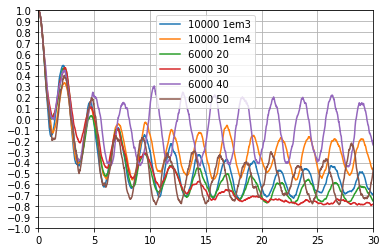

In [11]:
plt.plot(np.linspace(0, 30, 10000), sigma_zs_N_steps_10000_100, label="10000 1em3")
plt.plot(np.linspace(0, 30, 10000), sigma_zs_N_steps_10000_1em4_100, label="10000 1em4")
plt.plot(np.linspace(0, 30, 6000), sigma_zs_N_steps_6000_20, label="6000 20")
plt.plot(np.linspace(0, 30, 6000), sigma_zs_N_steps_6000_30, label="6000 30")
plt.plot(np.linspace(0, 30, 6000), sigma_zs_N_steps_6000_40, label="6000 40")
plt.plot(np.linspace(0, 30, 6000), sigma_zs_N_steps_6000_50, label="6000 50")
plt.ylim(-1, 1)
plt.legend()
plt.yticks(np.linspace(-1.0, 1.0, 21))
plt.xlim(0, 30)
plt.grid()
plt.show()

# Using the Pade decomposition

In [52]:
g, w = debye_spectral_density.get_debye_coefficients(13, T, gamma, eta, mode='pade')
g_compare, w_compare = debye_spectral_density.get_debye_coefficients(10000, T, gamma, eta)

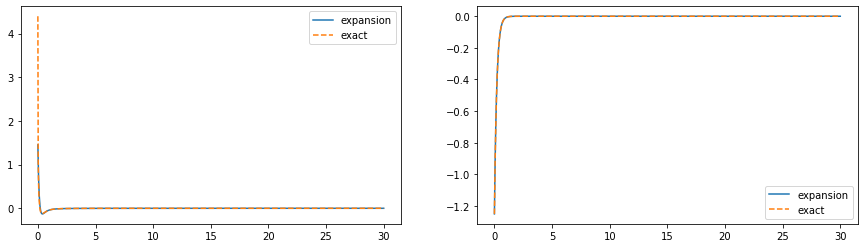

In [53]:
taus = np.linspace(0, 30, 1000)
alphas = bath_correlation_function.alpha(taus, g, w)
alphas_compare = bath_correlation_function.alpha(taus, g_compare, w_compare)
figure, axarray = plt.subplots(1, 2, figsize=(15, 4))
axarray[0].plot(taus, np.real(alphas), label="expansion")
axarray[0].plot(taus, np.real(alphas_compare), "--", label="exact")
axarray[0].legend()
axarray[1].plot(taus, np.imag(alphas), label="expansion")
axarray[1].plot(taus, np.imag(alphas_compare), "--", label="exact")
axarray[1].legend()
plt.show()

In [54]:
N_steps = 500
N_trunc = 9
#N = 10000
#w_cut = 1000
#J = lambda w : debye_spectral_density.debye_spectral_density(w, eta, gamma)
#generator = noise_generator.ColoredNoiseGenerator_SumApprox(J, 0, duration, N, w_cut, beta)
alpha = lambda tau : bath_correlation_function.alpha(tau, g, w)
generator = noise_generator.ColoredNoiseGenerator_FourierFiltering(alpha, 0, duration)
options = {
    'linear' : False,
    'use_noise' : True,
    'method' : 'RK4',
    'chi_max' : 10,
    'eps' : 1.e-3,
    'noise_generator' : generator,
    'rescale_aux' : True,
    'g_memory' : g,
    'w_memory' : w,
}

In [55]:
my_homps = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, options)
psis = my_homps.compute_realizations(100, progressBar=tqdm)

  0%|          | 0/100 [00:00<?, ?it/s]

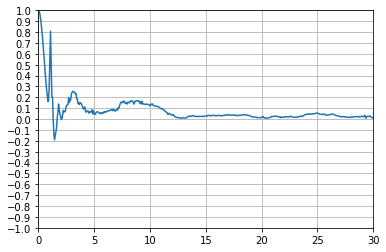

In [56]:
# sum approx noise, 500 N_steps
sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
plt.plot(np.linspace(0, 30, N_steps), sigma_zs)
plt.ylim(-1, 1)
plt.yticks(np.linspace(-1.0, 1.0, 21))
plt.xlim(0, 30)
plt.grid()
plt.show()

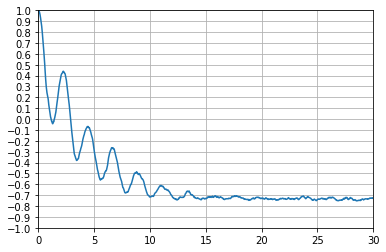

In [50]:
# sum approx noise, 6000 N_steps
sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
plt.plot(np.linspace(0, 30, N_steps), sigma_zs)
plt.ylim(-1, 1)
plt.yticks(np.linspace(-1.0, 1.0, 21))
plt.xlim(0, 30)
plt.grid()
plt.show()

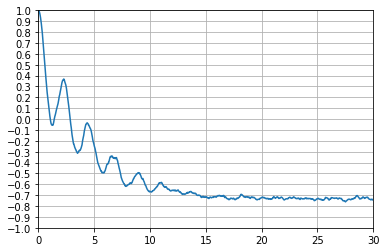

In [47]:
# FFT noise, 6000 N_steps
sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
plt.plot(np.linspace(0, 30, N_steps), sigma_zs)
plt.ylim(-1, 1)
plt.yticks(np.linspace(-1.0, 1.0, 21))
plt.xlim(0, 30)
plt.grid()
plt.show()

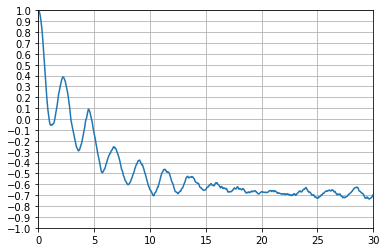

In [44]:
# FFT noise, 1000 N_steps
sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
plt.plot(np.linspace(0, 30, N_steps), sigma_zs)
plt.ylim(-1, 1)
plt.yticks(np.linspace(-1.0, 1.0, 21))
plt.xlim(0, 30)
plt.grid()
plt.show()

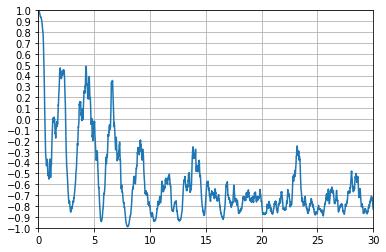

In [38]:
sigma_zs = compute_exp_val_nonlinear(psis, sigma_z)
plt.plot(np.linspace(0, 30, N_steps), sigma_zs)
plt.ylim(-1, 1)
plt.yticks(np.linspace(-1.0, 1.0, 21))
plt.xlim(0, 30)
plt.grid()
plt.show()

# Computing just one run: Different N_trunc

In [9]:
N_steps = 6000
N_trunc_list = [2, 4, 8, 16, 32]
N_terms = 13
N_terms_memory = 4300
alpha = lambda tau : bath_correlation_function.alpha(tau, g, w)
generator = noise_generator.ColoredNoiseGenerator_FourierFiltering(alpha, 0, duration)
options = {
    'linear' : False,
    'use_noise' : True,
    'method' : 'RK4',
    'chi_max' : 10,
    'eps' : 1.e-3,
    'noise_generator' : generator,
    'rescale_aux' : True,
    'g_memory' : g[:N_terms_memory],
    'w_memory' : w[:N_terms_memory],
}

In [10]:
psis_one_run_N_trunc = np.empty((len(N_trunc_list), N_steps, 2), dtype=complex)

for i, N_trunc in enumerate(N_trunc_list):
    print("Computing N_trunc =", N_trunc)
    start = time.time()
    my_homps = homps.HOMPS_Engine(g[:N_terms], w[:N_terms], h, L, duration, N_steps, N_trunc, options)
    psis = my_homps.compute_realizations(1)
    psis_one_run_N_trunc[i, :, :] = psis[0, :, :]
    end = time.time()
    print("took", end-start, "seconds.")

Computing N_trunc = 2
took 80.21018695831299 seconds.
Computing N_trunc = 4
took 81.51324939727783 seconds.
Computing N_trunc = 8
took 88.05666255950928 seconds.
Computing N_trunc = 16
took 184.82855010032654 seconds.
Computing N_trunc = 32
took 242.7231993675232 seconds.


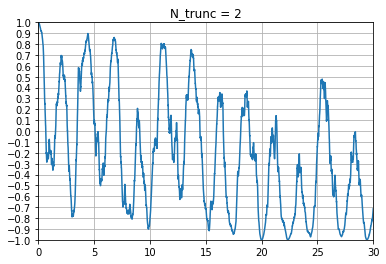

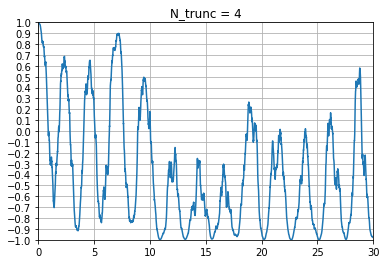

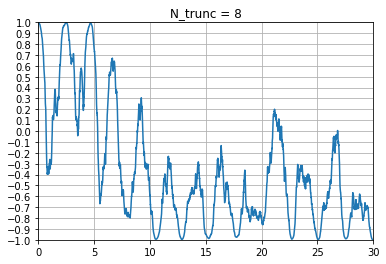

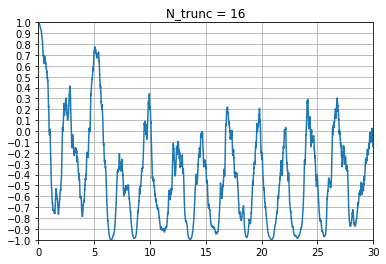

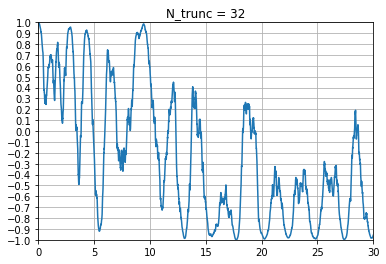

In [14]:
for i, N_trunc in enumerate(N_trunc_list):
    sigma_zs = compute_exp_val_nonlinear(np.expand_dims(psis_one_run_N_trunc[i,:,:], 0), sigma_z)
    plt.plot(np.linspace(0, 30, N_steps), sigma_zs)
    plt.title("N_trunc = "+str(N_trunc))
    plt.ylim(-1, 1)
    plt.yticks(np.linspace(-1.0, 1.0, 21))
    plt.xlim(0, 30)
    plt.grid()
    plt.show()

# Computing just one run: Different N_terms

In [15]:
N_steps = 6000
N_trunc = 10
N_terms_list = [5, 10, 20, 30]
N_terms_memory = 4300
alpha = lambda tau : bath_correlation_function.alpha(tau, g, w)
generator = noise_generator.ColoredNoiseGenerator_FourierFiltering(alpha, 0, duration)
options = {
    'linear' : False,
    'use_noise' : True,
    'method' : 'RK4',
    'chi_max' : 10,
    'eps' : 1.e-3,
    'noise_generator' : generator,
    'rescale_aux' : True,
    'g_memory' : g[:N_terms_memory],
    'w_memory' : w[:N_terms_memory],
}

In [16]:
psis_one_run_N_terms = np.empty((len(N_terms_list), N_steps, 2), dtype=complex)

for i, N_terms in enumerate(N_terms_list):
    print("Computing N_terms =", N_terms)
    start = time.time()
    my_homps = homps.HOMPS_Engine(g[:N_terms], w[:N_terms], h, L, duration, N_steps, N_trunc, options)
    psis = my_homps.compute_realizations(1)
    psis_one_run_N_terms[i, :, :] = psis[0, :, :]
    end = time.time()
    print("took", end-start, "seconds.")

Computing N_terms = 5
took 47.5736289024353 seconds.
Computing N_terms = 10
took 100.76538681983948 seconds.
Computing N_terms = 20
took 192.84314489364624 seconds.
Computing N_terms = 30
took 284.61504077911377 seconds.


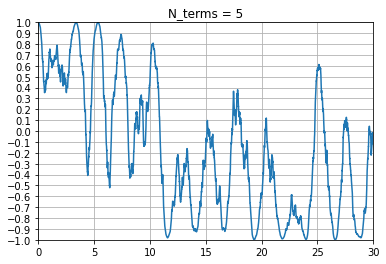

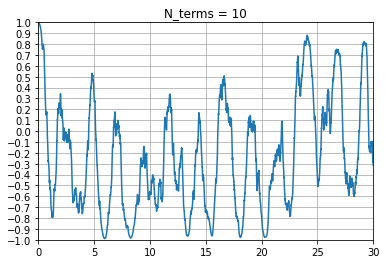

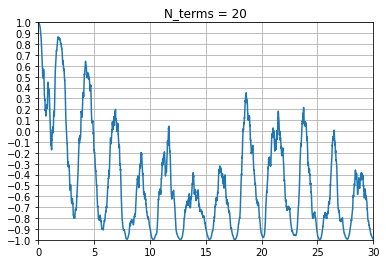

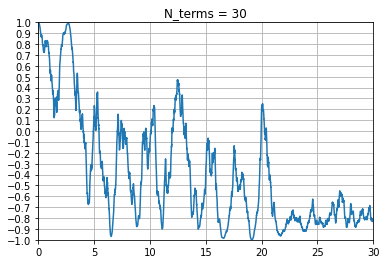

In [17]:
for i, N_terms in enumerate(N_terms_list):
    sigma_zs = compute_exp_val_nonlinear(np.expand_dims(psis_one_run_N_terms[i,:,:], 0), sigma_z)
    plt.plot(np.linspace(0, 30, N_steps), sigma_zs)
    plt.title("N_terms = "+str(N_terms))
    plt.ylim(-1, 1)
    plt.yticks(np.linspace(-1.0, 1.0, 21))
    plt.xlim(0, 30)
    plt.grid()
    plt.show()

# Computing just one run: Different N_terms_memory

In [25]:
N_steps = 6000
N_trunc = 10
N_terms = 15
N_terms_memory_list = [10, 100, 500, 1000, 4300]
alpha = lambda tau : bath_correlation_function.alpha(tau, g, w)
generator = noise_generator.ColoredNoiseGenerator_FourierFiltering(alpha, 0, duration)
options = {
    'linear' : False,
    'use_noise' : True,
    'method' : 'RK4',
    'chi_max' : 10,
    'eps' : 1.e-3,
    'noise_generator' : generator,
    'rescale_aux' : True,
    'g_memory' : None,
    'w_memory' : None
}

In [28]:
psis_one_run_N_terms_memory = np.empty((len(N_terms_memory_list), N_steps, 2), dtype=complex)

for i, N_terms_memory in enumerate(N_terms_memory_list):
    print("Computing N_terms_memory =", N_terms_memory)
    start = time.time()
    options['g_memory'] = g[:N_terms_memory]
    options['w_memory'] = w[:N_terms_memory]
    my_homps = homps.HOMPS_Engine(g[:N_terms], w[:N_terms], h, L, duration, N_steps, N_trunc, options)
    psis = my_homps.compute_realizations(1)
    psis_one_run_N_terms_memory[i, :, :] = psis[0, :, :]
    end = time.time()
    print("took", end-start, "seconds.")

Computing N_terms_memory = 10
took 147.0486433506012 seconds.
Computing N_terms_memory = 100
took 134.2183747291565 seconds.
Computing N_terms_memory = 500
took 126.27449488639832 seconds.
Computing N_terms_memory = 1000
took 125.0430703163147 seconds.
Computing N_terms_memory = 4300
took 142.02601051330566 seconds.


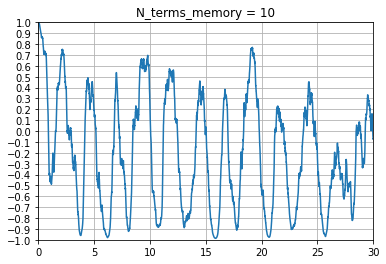

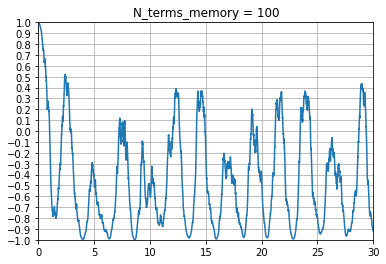

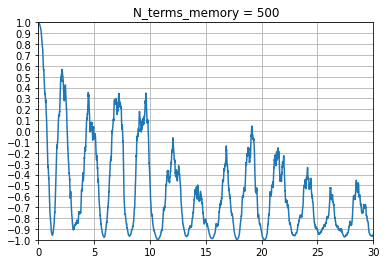

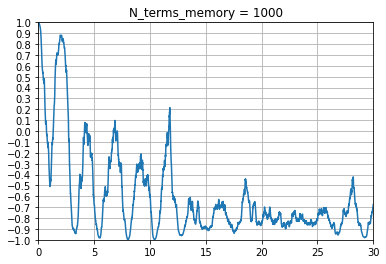

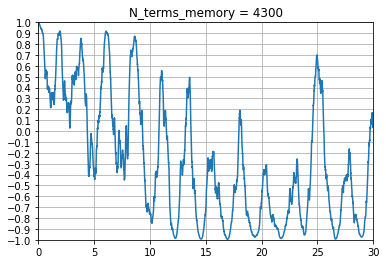

In [29]:
for i, N_terms_memory in enumerate(N_terms_memory_list):
    sigma_zs = compute_exp_val_nonlinear(np.expand_dims(psis_one_run_N_terms_memory[i,:,:], 0), sigma_z)
    plt.plot(np.linspace(0, 30, N_steps), sigma_zs)
    plt.title("N_terms_memory = "+str(N_terms_memory))
    plt.ylim(-1, 1)
    plt.yticks(np.linspace(-1.0, 1.0, 21))
    plt.xlim(0, 30)
    plt.grid()
    plt.show()